In [1]:
import PyCC
import numpy as np
import matplotlib.pyplot as plt
def plot_pretty(dpi=200,fontsize=10):
    plt.rcParams['figure.dpi']= dpi
    plt.rc("savefig", dpi=dpi)
    plt.rc('font', size=fontsize)
    plt.rc('xtick', direction='in')
    plt.rc('ytick', direction='in')
    plt.rc('xtick.major', pad=5)
    plt.rc('xtick.minor', pad=5)
    plt.rc('ytick.major', pad=5)
    plt.rc('ytick.minor', pad=5)
    plt.rc('lines', dotted_pattern = [2., 2.])
    plt.rc('legend',fontsize=5)
    plt.rcParams['figure.figsize'] = [5, 3]

plot_pretty()

In [2]:
plummer = PyCC.Distributions.Plummer(1000,1,1,1)

nsteps = 100

outf8,stats = PyCC.evaluate(plummer,steps=nsteps,dt=1/64,precision="f8",accelerate=False)
print("f8",stats)
outf4,stats = PyCC.evaluate(plummer,steps=nsteps,dt=1/64,precision="f4",accelerate=False)
print("f4",stats)
outf4gpu,stats = PyCC.evaluate(plummer,steps=nsteps,dt=1/64,precision="f4",accelerate=True)
print("f4gpu",stats)
outf2gpu,stats = PyCC.evaluate(plummer,steps=nsteps,dt=1/64,precision="f2",accelerate=True)
print("f2gpu",stats)

f8 {'eval_time': 1.5105308749999997}
f4 {'eval_time': 1.0273784169999995}
f4gpu {'eval_time': 0.14985587500000008}
f2gpu {'eval_time': 0.15918329099999973}


In [3]:
ke = []
phis = []
kef4 = []
phisf4 = []
kef4gpu = []
phisf4gpu = []
kef2gpu = []
phisf2gpu = []

for step in range(nsteps+1):
    vels = outf8[outf8["step"] == step].loc[:,["vx","vy","vz"]].to_numpy()
    speeds = np.linalg.norm(vels,axis=1)
    energies = (1/2) * plummer.loc[:,"mass"].to_numpy()[0] * (speeds**2)
    energy = np.sum(energies)
    ke.append(energy)
    phis.append(np.sum(outf8[outf8["step"] == step].loc[:,"phi"].to_numpy())/2)

    vels = outf4[outf4["step"] == step].loc[:,["vx","vy","vz"]].to_numpy()
    speeds = np.linalg.norm(vels,axis=1)
    energies = (1/2) * plummer.loc[:,"mass"].to_numpy()[0] * (speeds**2)
    energy = np.sum(energies)
    kef4.append(energy)
    phisf4.append(np.sum(outf4[outf4["step"] == step].loc[:,"phi"].to_numpy())/2)

    vels = outf4gpu[outf4gpu["step"] == step].loc[:,["vx","vy","vz"]].to_numpy()
    speeds = np.linalg.norm(vels,axis=1)
    energies = (1/2) * plummer.loc[:,"mass"].to_numpy()[0] * (speeds**2)
    energy = np.sum(energies)
    kef4gpu.append(energy)
    phisf4gpu.append(np.sum(outf4gpu[outf4gpu["step"] == step].loc[:,"phi"].to_numpy())/2)

    vels = outf2gpu[outf2gpu["step"] == step].loc[:,["vx","vy","vz"]].to_numpy()
    speeds = np.linalg.norm(vels,axis=1)
    energies = (1/2) * plummer.loc[:,"mass"].to_numpy()[0] * (speeds**2)
    energy = np.sum(energies)
    kef2gpu.append(energy)
    phisf2gpu.append(np.sum(outf2gpu[outf2gpu["step"] == step].loc[:,"phi"].to_numpy())/2)

ke = np.array(ke)
phis = np.array(phis)
tot = ke+phis

kef4 = np.array(kef4)
phisf4 = np.array(phisf4)
totf4 = kef4+phisf4

kef4gpu = np.array(kef4gpu)
phisf4gpu = np.array(phisf4gpu)
totf4gpu = kef4gpu+phisf4gpu

kef2gpu = np.array(kef2gpu)
phisf2gpu = np.array(phisf2gpu)
totf2gpu = kef2gpu+phisf2gpu

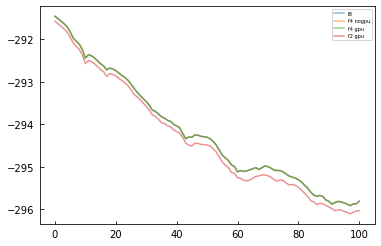

In [4]:
plt.plot(tot,label="f8",alpha=0.5)
plt.plot(totf4,label="f4 nogpu",alpha=0.5)
plt.plot(totf4gpu,label="f4 gpu",alpha=0.5)
plt.plot(totf2gpu,label="f2 gpu",alpha=0.5)
plt.legend()
plt.show()

[]

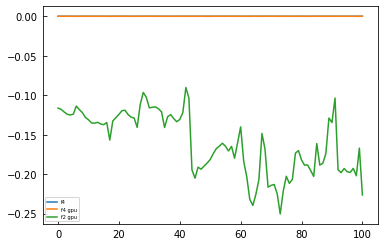

In [5]:
plt.plot(totf4 - tot,label="f4")
plt.plot(totf4gpu - tot,label="f4 gpu")
plt.plot(totf2gpu - tot,label="f2 gpu")
plt.legend()
plt.plot()